Importing libraries and ajusting design

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
mpl.rcParams['figure.figsize'] = [11.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.facecolor']='white'
mpl.rcParams['font.size'] = 12
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['figure.titlesize'] = 'small'
mpl.rcParams["figure.figsize"] = [8, 8]
mpl.style.use('bmh')


Connecting to drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'drive', 'sample_data']


In [74]:
os.listdir('/content/drive/MyDrive/project/python_churn/churn.csv')

['churn_project.ipynb', 'churn.csv', 'python_project_Churn.pptx']

Importing data 

In [75]:
dfc=pd.read_csv("/content/drive/MyDrive/project/python_churn/churn.csv")
dfc=dfc.rename(columns=str.lower)
dfc.shape

(7043, 21)

ETL prossesses

In [76]:
columns_list=list(dfc.columns)
check_list=['Yes','No']
for i in columns_list:
    column_u=list(dfc[i].unique())
    if all(elem in column_u  for elem in check_list):
        dfc.loc[(dfc[i]!='No')&(dfc[i]!='Yes'),i]='No'
dfc.loc[dfc['churn']=='No','churn']=0
dfc.loc[dfc['churn']=='Yes','churn']=1
dfc.churn=dfc.churn.astype(int)
dfc['tenure_year']='0-0.5 year'
dfc.loc[(dfc['tenure']>6) & (dfc['tenure']<=12) ,['tenure_year']]='0.5-1 years'
dfc.loc[(dfc['tenure']>12) & (dfc['tenure']<=24) ,['tenure_year']]='2 years'
dfc.loc[(dfc['tenure']>24) & (dfc['tenure']<=36) ,['tenure_year']]='3 years'
dfc.loc[(dfc['tenure']>36) & (dfc['tenure']<=48) ,['tenure_year']]='4 years'
dfc.loc[(dfc['tenure']>48)  ,['tenure_year']]='5 years & more'

x=dfc['totalcharges']
x=x.replace(" ",0.0)
x.astype(float)
dfc['totalcharges']=x
dfc['totalcharges']=dfc['totalcharges'].astype('float64')

dfc['totalcharges_rank']='>7000'
dfc.loc[(dfc['totalcharges']<=7000) & (dfc['totalcharges']>=6000),'tot_crg_rank']='6000-7000'
dfc.loc[(dfc['totalcharges']<=6000) & (dfc['totalcharges']>=5000),'tot_crg_rank']='6000-5000'
dfc.loc[(dfc['totalcharges']<=5000) & (dfc['totalcharges']>=4000),'tot_crg_rank']='5000-4000'
dfc.loc[(dfc['totalcharges']<=4000) & (dfc['totalcharges']>=3000),'tot_crg_rank']='4000-3000'
dfc.loc[(dfc['totalcharges']<=3000) & (dfc['totalcharges']>=2000),'tot_crg_rank']='3000-2000'
dfc.loc[(dfc['totalcharges']<=2000) & (dfc['totalcharges']>=1000),'tot_crg_rank']='2000-1000'
dfc.loc[(dfc['totalcharges']<=1000) & (dfc['totalcharges']>=0),'tot_crg_rank']='0-1000'

dfc['mthlycharges_rank']='>100'
dfc.loc[(dfc['monthlycharges']>0) & (dfc['monthlycharges']<=35),'mth_crg_rank']='0-35'
dfc.loc[(dfc['monthlycharges']>35) & (dfc['monthlycharges']<=70),'mth_crg_rank']='35-70'
dfc.loc[(dfc['monthlycharges']>70) & (dfc['monthlycharges']<=90),'mth_crg_rank']='70-90'
dfc.loc[(dfc['monthlycharges']>90) & (dfc['monthlycharges']<=100),'mth_crg_rank']='90-100'
dfc['family_statues']='single'
dfc.loc[(dfc['partner']=='Yes') & (dfc['dependents']=='Yes'),'family_statues' ]='family'
dfc.loc[(dfc['partner']=='Yes') & (dfc['dependents']=='No'),'family_statues']='couple'       
dfc.loc[(dfc['partner']=='No') & (dfc['dependents']=='Yes'),'family_statues']='single parent' 
dfc=dfc.drop(['partner','dependents','tenure','monthlycharges','totalcharges','customerid'],axis=1)
dfc.head()


,gender,seniorcitizen,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,...,contract,paperlessbilling,paymentmethod,churn,tenure_year,totalcharges_rank,tot_crg_rank,mthlycharges_rank,mth_crg_rank,family_statues
0,Female,0,No,No,DSL,No,Yes,No,No,No,...,Month-to-month,Yes,Electronic check,0,0-0.5 year,>7000,0-1000,>100,0-35,couple
1,Male,0,Yes,No,DSL,Yes,No,Yes,No,No,...,One year,No,Mailed check,0,3 years,>7000,2000-1000,>100,35-70,single
2,Male,0,Yes,No,DSL,Yes,Yes,No,No,No,...,Month-to-month,Yes,Mailed check,1,0-0.5 year,>7000,0-1000,>100,35-70,single
3,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,...,One year,No,Bank transfer (automatic),0,4 years,>7000,2000-1000,>100,35-70,single
4,Female,0,Yes,No,Fiber optic,No,No,No,No,No,...,Month-to-month,Yes,Electronic check,1,0-0.5 year,>7000,0-1000,>100,70-90,single


Basic visualization and insight

Text(0, 0.5, 'percentage')

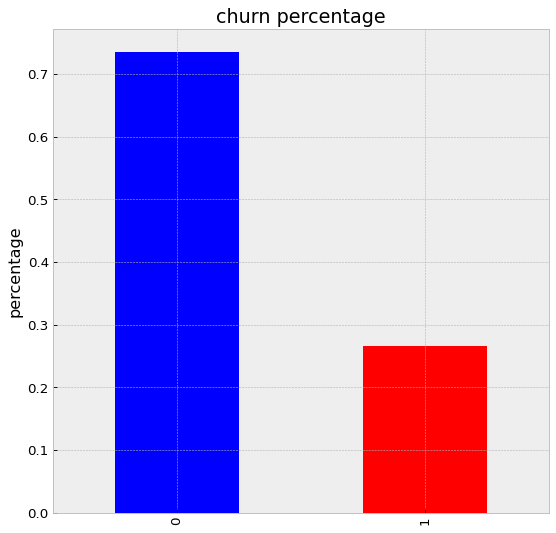

In [7]:
c = np.array(["blue","red"])
ax=dfc.churn.value_counts(normalize=True).plot(kind='bar',title='churn percentage', color=c);
plt.ylabel('percentage')

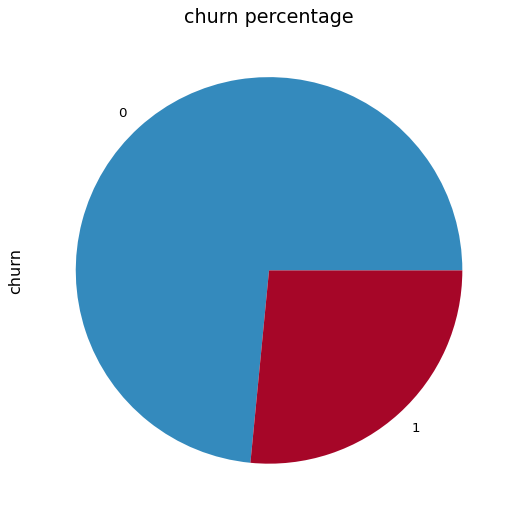

In [8]:
ax=dfc.churn.value_counts(normalize=True).plot(kind='pie',title='churn percentage');

In [9]:
dfc.groupby(['contract']).agg({'churn':['sum','count','mean']})
#dfc.groupby(['contract']).agg({'churn':['sum','count','mean']}).plot(kind='bar',subplots=True)

churn                
                 sum count      mean
contract                            
Month-to-month  1655  3875  0.427097
One year         166  1473  0.112695
Two year          48  1695  0.028319

Month-to-month contract have high levels of churn 42.7 %

In [10]:
dfc.groupby(['contract','internetservice']).agg({'churn':['sum','count','mean']})


churn                
                                 sum count      mean
contract       internetservice                      
Month-to-month DSL               394  1223  0.322159
               Fiber optic      1162  2128  0.546053
               No                 99   524  0.188931
One year       DSL                53   570  0.092982
               Fiber optic       104   539  0.192950
               No                  9   364  0.024725
Two year       DSL                12   628  0.019108
               Fiber optic        31   429  0.072261
               No                  5   638  0.007837

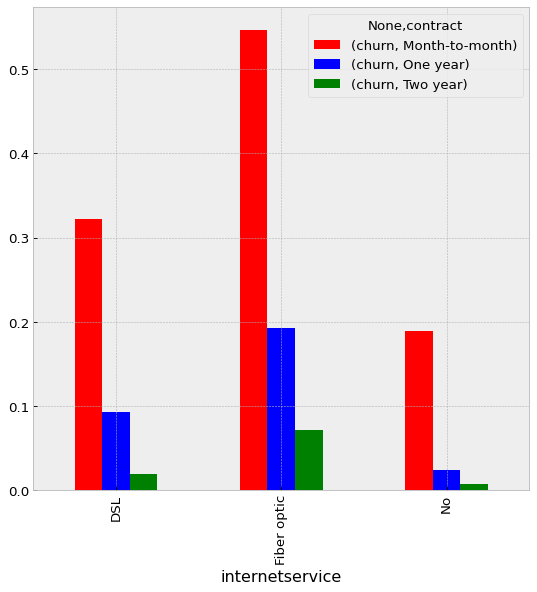

In [11]:
dfc.groupby(['contract','internetservice']).agg({'churn':'mean'}).unstack(0).plot(kind='bar', color=['red', 'blue' , 'green'])


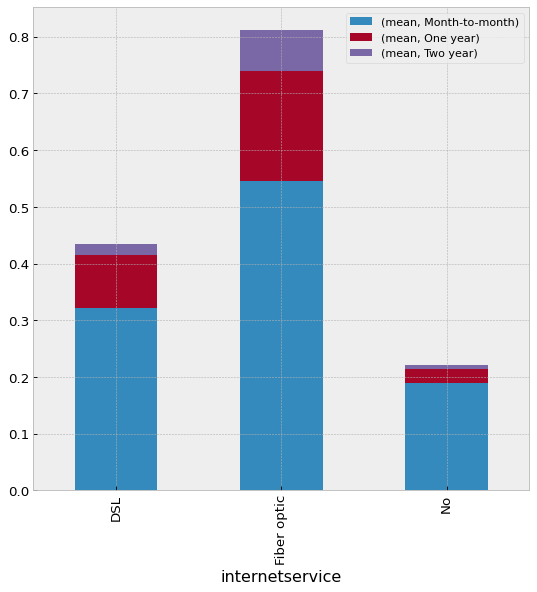

In [12]:
dfc.groupby('internetservice').agg({'churn':['sum','count','mean']})                          
#fiber optics 41% churn
gb_is_fs_c=dfc.groupby(['internetservice','contract']).agg({'churn':['mean']}) 
pt_gb_is_fs_c=gb_is_fs_c.pivot_table(index="internetservice", columns='contract', values='churn')
pt_gb_is_fs_c.plot(kind='bar', stacked=True,)
plt.legend( loc=1,prop={'size': 10})
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f136d80d0>,
      dtype=object)

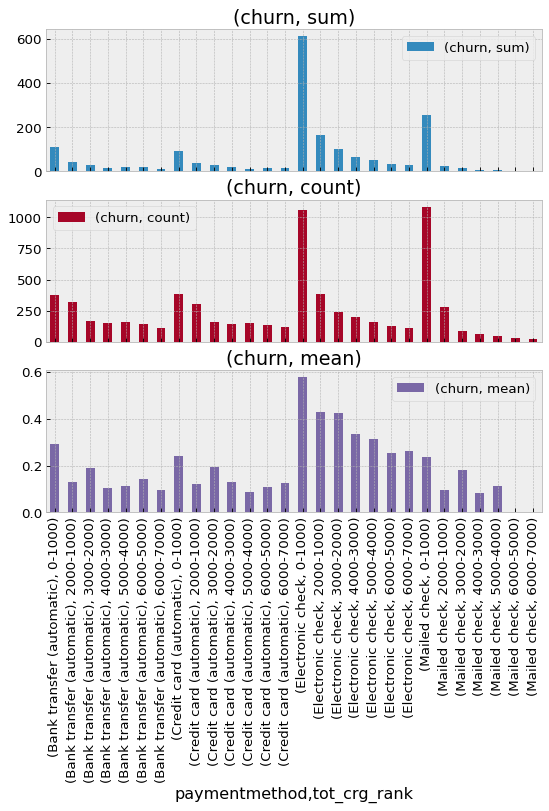

In [13]:
dfc.groupby('tot_crg_rank').agg({'churn':[sum,'count','mean']})  
#total charge < 1000$ 36% churn
dfc.groupby(['paymentmethod','tot_crg_rank']).agg({'churn':['sum','count','mean']}) 
dfc.groupby(['paymentmethod','tot_crg_rank']).agg({'churn':['sum','count','mean']}).plot(kind='bar',subplots=True)

electronic check + total charge <1000 churn of 57.7%

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f134aa6d0>,
      dtype=object)

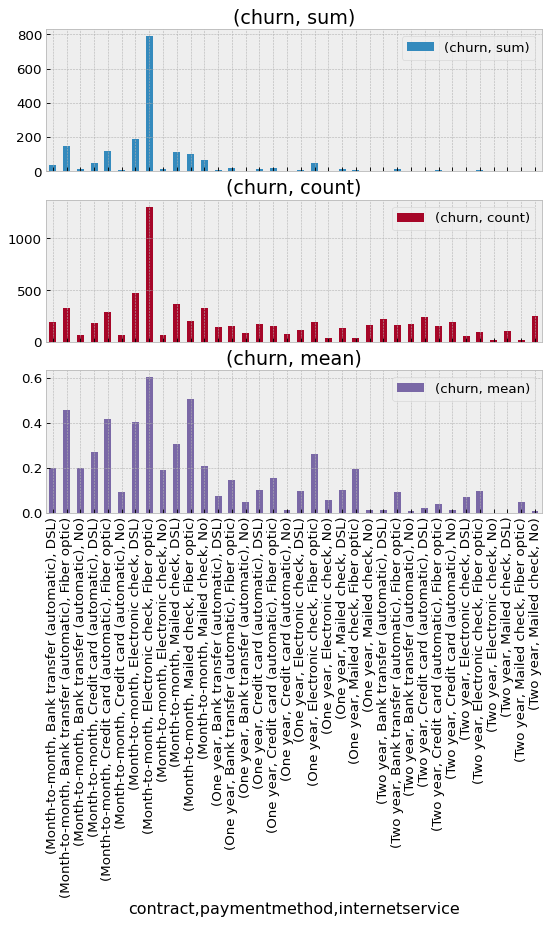

In [14]:
dfc.groupby(['contract','paymentmethod','internetservice']).agg({'churn':['sum','count','mean']})
dfc.groupby(['contract','paymentmethod','internetservice']).agg({'churn':['sum','count','mean']}).plot(kind='bar',subplots=True)

month to month + electrinc check+ fiber - 60% churn

In [15]:
dfc.groupby('tenure_year').agg({'churn':[sum,'count','mean']})  
#up to 6 tenure churn 53% 


churn                
                 sum count      mean
tenure_year                         
0-0.5 year       784  1481  0.529372
0.5-1 years      253   705  0.358865
2 years          294  1024  0.287109
3 years          180   832  0.216346
4 years          145   762  0.190289
5 years & more   213  2239  0.095132

In [16]:
dfc.groupby('gender').agg({'churn':[sum,'count','mean']}) 
#no big diffrent

churn                
         sum count      mean
gender                      
Female   939  3488  0.269209
Male     930  3555  0.261603

In [17]:
dfc.groupby('mth_crg_rank').agg({'churn':[sum,'count','mean']})  
#mothly charge betweem 70-100 38% churn

churn                
               sum count      mean
mth_crg_rank                      
0-35           189  1735  0.108934
35-70          413  1725  0.239420
70-90          697  1844  0.377983
90-100         317   837  0.378734

In [18]:
dfc.groupby(['mth_crg_rank','tenure_year',]).agg({'churn':['sum','count','mean']})       
#with streamTV 30% churn
#dfc.groupby(['mth_crg_rank','tenure_year',]).agg({'churn':['mean']}) .unstack(0).plot(kind='bar', color=[ 'blue' ,'yellow','red', 'green'],figsize=(14,10) )

churn                
                              sum count      mean
mth_crg_rank tenure_year                         
0-35         0-0.5 year       126   443  0.284424
             0.5-1 years       26   198  0.131313
             2 years           15   271  0.055351
             3 years            9   190  0.047368
             4 years            7   184  0.038043
             5 years & more     6   449  0.013363
35-70        0-0.5 year       251   474  0.529536
             0.5-1 years       40   196  0.204082
             2 years           61   275  0.221818
             3 years           17   202  0.084158
             4 years           23   179  0.128492
             5 years & more    21   399  0.052632
70-90        0-0.5 year       316   446  0.708520
             0.5-1 years      113   211  0.535545
             2 years          116   290  0.400000
             3 years           75   233  0.321888
             4 years           43   168  0.255952
             5 years & more    34   496  0.068548
90-100       0-0.5 year        73    95  0.768421
             0.5-1 years       53    72  0.736111
             2 years           69   130  0.530769
             3 years           48   120  0.400000
             4 years           27   111  0.243243
             5 years & more    47   309  0.152104

monthly charge(90-100) + tenure (up to 2 years) 76.8%-53% churn

monthly charge(70-90) + tenure (up to 1 years) 70%-53.5% churn

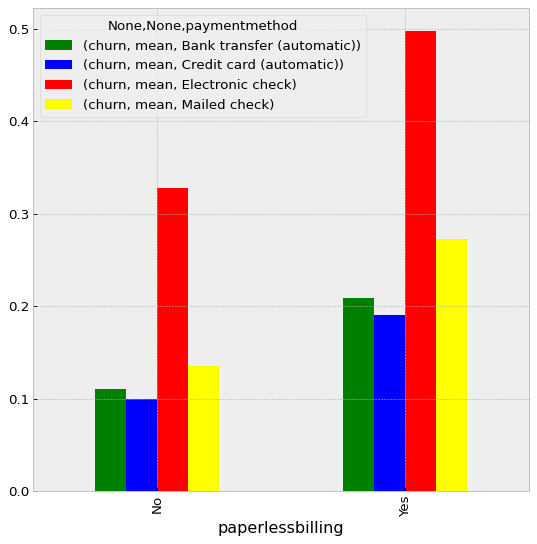

In [19]:
dfc.groupby(['paymentmethod','paperlessbilling']).agg({'churn':['sum','count','mean']})
#electronic check 45% churn
dfc.groupby(['paymentmethod','paperlessbilling']).agg({'churn':['mean']}).unstack(0).plot(kind='bar', color=['green', 'blue' ,  'red','yellow'])

In [20]:
dfc.groupby('family_statues').agg({'churn' : ([sum,'count','mean'])}) 
#singles 34% churn
dfc.groupby(['family_statues','seniorcitizen']).agg({'churn' : ([sum,'count','mean'])}) 

churn                
                               sum count      mean
family_statues seniorcitizen                      
couple         0               242  1163  0.208083
               1               178   490  0.363265
family         0               229  1666  0.137455
               1                20    83  0.240964
single         0               847  2719  0.311512
               1               276   561  0.491979
single parent  0                75   353  0.212465
               1                 2     8  0.250000

singel senior citizen 49% churn

In [21]:
dfc.groupby('paperlessbilling').agg({'churn':['sum','count','mean']}) 
#paper billing 33% churn

churn                
                   sum count      mean
paperlessbilling                      
No                 469  2872  0.163301
Yes               1400  4171  0.335651

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f1344f790>,
      dtype=object)

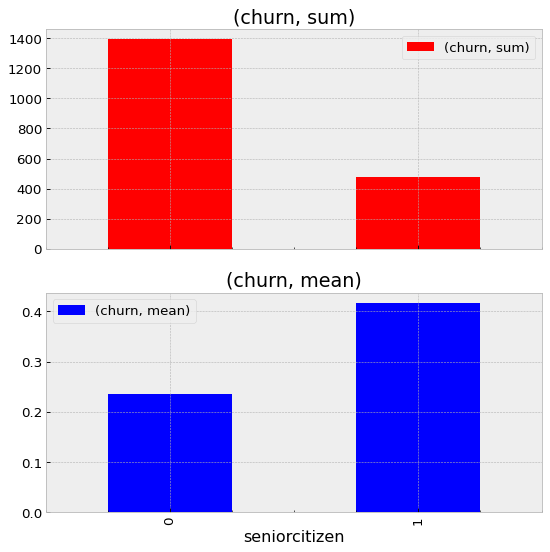

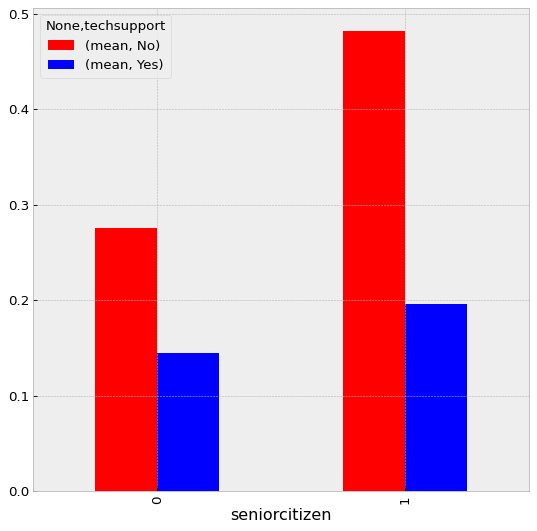

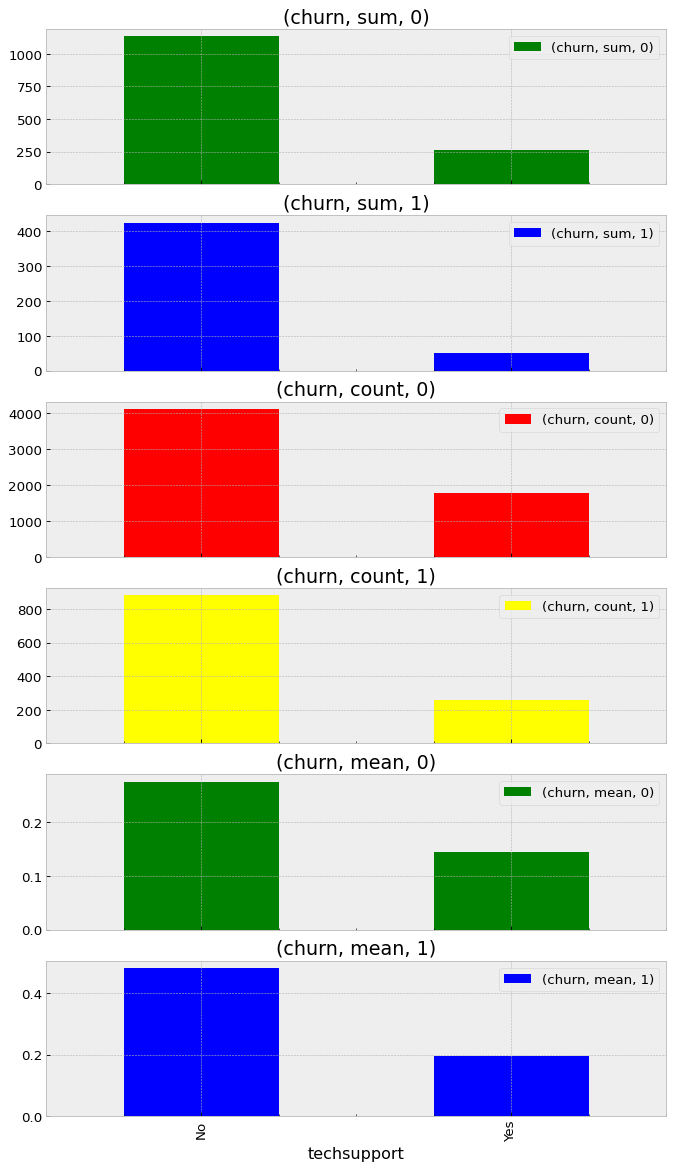

In [22]:
dfc.groupby(['seniorcitizen']).agg({'churn':['sum','count','mean']}) 
#senior citizen 41% churn
dfc.groupby(['seniorcitizen']).agg({'churn':['sum','mean']}).plot(kind='bar',color=['red','blue','green'],subplots=True)
dfc.groupby(['seniorcitizen','techsupport']).agg({'churn':['sum','count','mean']})
#senior citizen with no tech support 48% churn
dfc.groupby(['seniorcitizen','techsupport']).agg({'churn':['mean']}).pivot_table(index="seniorcitizen", columns="techsupport", values='churn').plot(kind='bar',color=['red','blue'])

dfc.groupby(['seniorcitizen','techsupport']).agg({'churn':['sum','count','mean']}) .unstack(0).plot(kind='bar', color=['green', 'blue' ,'red','yellow'],subplots=True, figsize=(10,18))


In [23]:
dfc.groupby('onlinesecurity').agg({'churn':['sum','count','mean']}) 
#no online security 31% churn


churn                
                 sum count      mean
onlinesecurity                      
No              1574  5024  0.313296
Yes              295  2019  0.146112

In [24]:
dfc.groupby('techsupport').agg({'churn':['sum','count','mean']}) 
#no tech support 31% churn

churn                
              sum count      mean
techsupport                      
No           1559  4999  0.311862
Yes           310  2044  0.151663

In [25]:
dfc.groupby(['mth_crg_rank']).agg({'churn':['sum','count','mean']})
#dfc.groupby(['mth_crg_rank']).agg({'churn':['mean']}).unstack(0).plot(kind='bar', color=['green', 'blue','red','yellow'])

churn                
               sum count      mean
mth_crg_rank                      
0-35           189  1735  0.108934
35-70          413  1725  0.239420
70-90          697  1844  0.377983
90-100         317   837  0.378734

In [26]:
x=dfc.groupby(['paymentmethod','mth_crg_rank','tenure_year']).agg({'churn':['sum','count','mean']})
print(x.to_string())


                                                      churn                
                                                        sum count      mean
paymentmethod             mth_crg_rank tenure_year                         
Bank transfer (automatic) 0-35         0-0.5 year        12    37  0.324324
                                       0.5-1 years        4    32  0.125000
                                       2 years            4    43  0.093023
                                       3 years            3    44  0.068182
                                       4 years            1    50  0.020000
                                       5 years & more     2   157  0.012739
                          35-70        0-0.5 year        19    40  0.475000
                                       0.5-1 years        4    39  0.102564
                                       2 years           11    49  0.224490
                                       3 years            5    38  0.131579
            

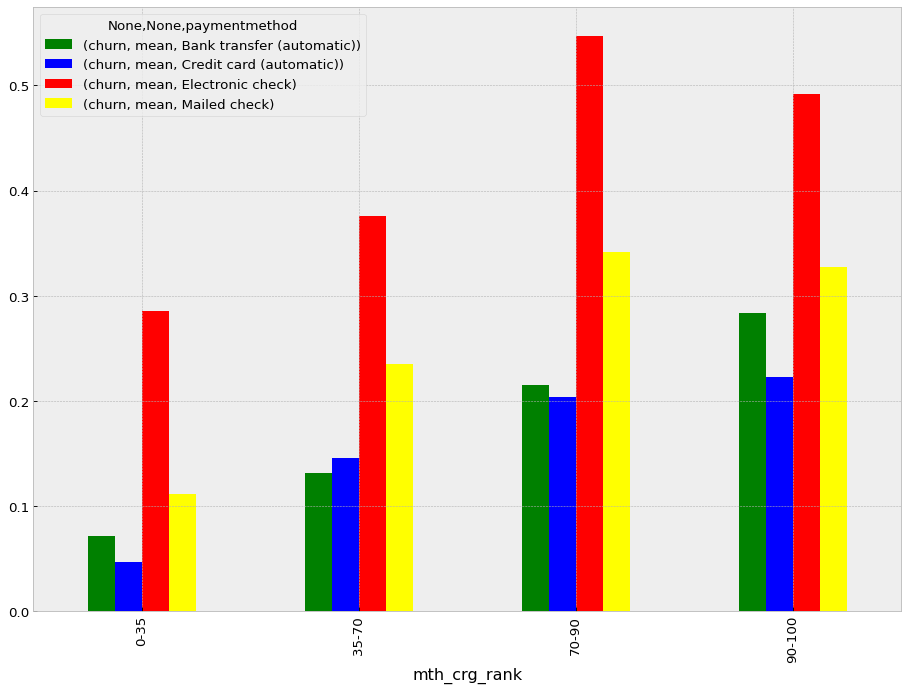

In [27]:
dfc.groupby(['paymentmethod','mth_crg_rank']).agg({'churn':['sum','count','mean']}),dfc.groupby(['paymentmethod']).agg({'churn':['sum','count','mean']})
dfc.groupby(['paymentmethod']).agg({'churn':['sum','count','mean']}) 
dfc.groupby(['paymentmethod','mth_crg_rank']).agg({'churn':['mean']}).unstack(0).plot(kind='bar', color=['green', 'blue','red','yellow'],figsize=(14,10))

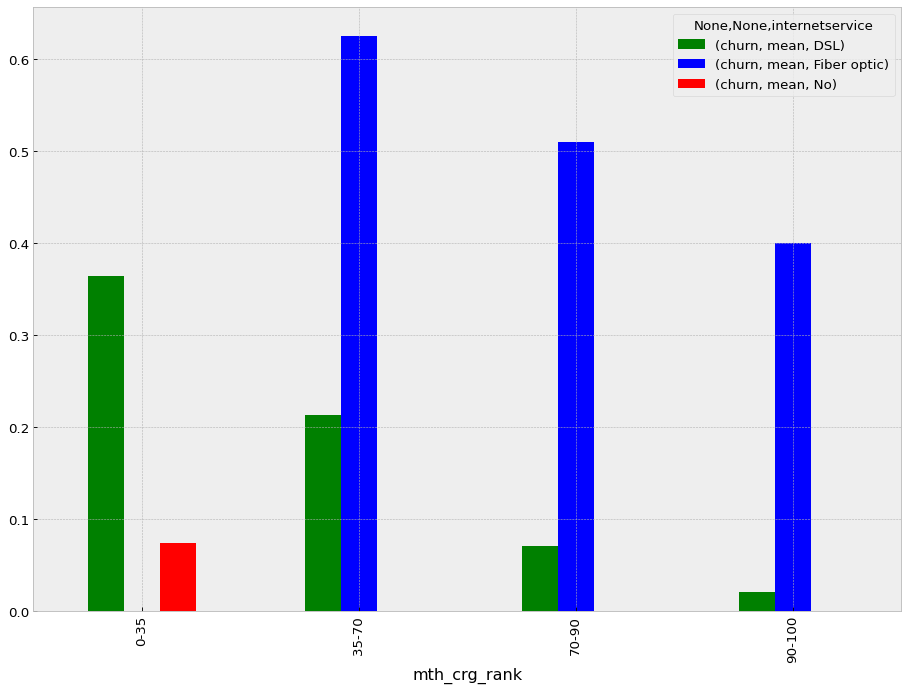

In [28]:
dfc.groupby(['internetservice','mth_crg_rank']).agg({'churn':[sum,'count','mean']}),dfc.groupby(['internetservice']).agg({'churn':[sum,'count','mean']})  
dfc.groupby(['internetservice','mth_crg_rank']).agg({'churn':['mean']}).unstack(0).plot(kind='bar', color=['green', 'blue','red','yellow'],figsize=(14,10))

<Figure size 640x640 with 0 Axes>

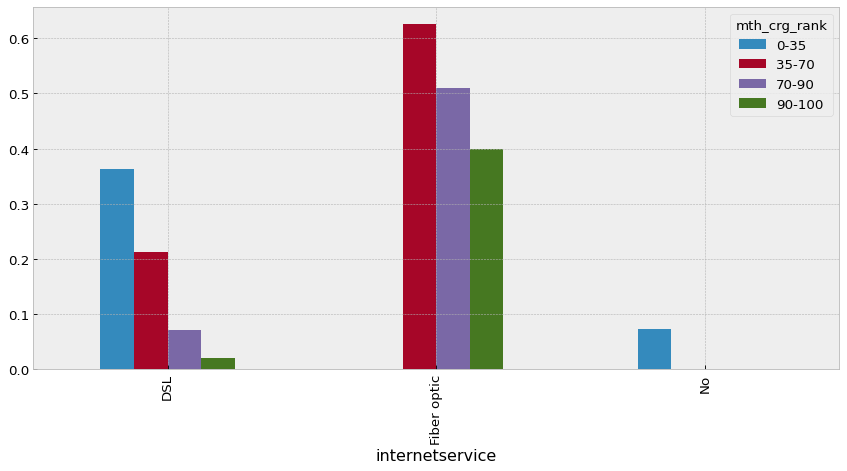

churn
internetservice mth_crg_rank          
DSL             0-35          0.363636
                35-70         0.212647
                70-90         0.070652
                90-100        0.021277
Fiber optic     35-70         0.625000
                70-90         0.509288
                90-100        0.400000
No              0-35          0.074050

In [29]:
gb_is_ncr=dfc.groupby(['internetservice','mth_crg_rank']).agg({'churn':'mean'})    
pt_gb_is_ncr=gb_is_ncr.pivot_table(index="internetservice", columns="mth_crg_rank", values='churn')
plt.figure(figsize=(8,8))
pt_gb_is_ncr.plot.bar(figsize=(13,6))
plt.show()
pt_gb_is_ncr
gb_is_ncr

In [30]:
dfc.groupby(['contract','paperlessbilling']).agg({'churn':['sum','count','mean']})  

churn                
                                  sum count      mean
contract       paperlessbilling                      
Month-to-month No                 406  1289  0.314973
               Yes               1249  2586  0.482985
One year       No                  48   673  0.071322
               Yes                118   800  0.147500
Two year       No                  15   910  0.016484
               Yes                 33   785  0.042038

In [31]:
dfc.groupby('tot_crg_rank').agg({'churn' : ([sum,'count','mean'])}) 

churn                
               sum count      mean
tot_crg_rank                      
0-1000        1070  2904  0.368457
2000-1000      269  1283  0.209665
3000-2000      180   652  0.276074
4000-3000      107   556  0.192446
5000-4000       86   513  0.167641
6000-5000       69   443  0.155756
6000-7000       55   365  0.150685

In [32]:
dfc.groupby('deviceprotection').agg({'churn':['sum','count','mean']}) 

churn                
                   sum count      mean
deviceprotection                      
No                1324  4621  0.286518
Yes                545  2422  0.225021

In [33]:
dfc.groupby('phoneservice').agg({'churn':['sum','count','mean']})    
    

churn                
               sum count      mean
phoneservice                      
No             170   682  0.249267
Yes           1699  6361  0.267096

In [34]:
dfc.groupby('multiplelines').agg({'churn':['sum','count','mean']})   

churn                
                sum count      mean
multiplelines                      
No             1019  4072  0.250246
Yes             850  2971  0.286099

<Figure size 640x640 with 0 Axes>

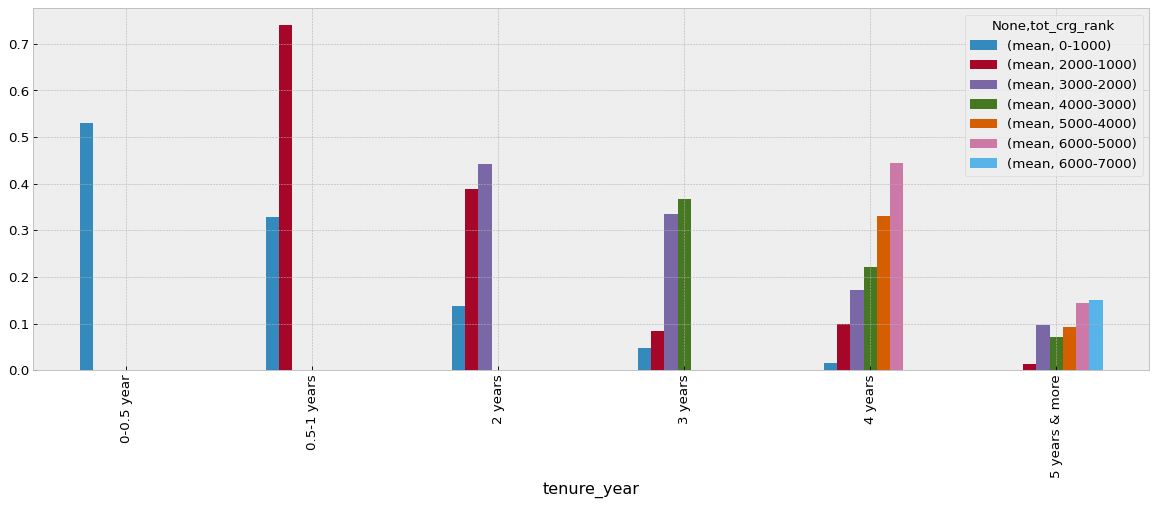

mean                                                    \
tot_crg_rank      0-1000 2000-1000 3000-2000 4000-3000 5000-4000 6000-5000   
tenure_year                                                                  
0-0.5 year      0.529372       NaN       NaN       NaN       NaN       NaN   
0.5-1 years     0.329771  0.740000       NaN       NaN       NaN       NaN   
2 years         0.137529  0.388031  0.441558       NaN       NaN       NaN   
3 years         0.047368  0.084211  0.335347  0.366667   0.00000       NaN   
4 years         0.015267  0.100000  0.172185  0.221698   0.33125  0.444444   
5 years & more  0.000000  0.013793  0.096774  0.071429   0.09375  0.143529   

                          
tot_crg_rank   6000-7000  
tenure_year               
0-0.5 year           NaN  
0.5-1 years          NaN  
2 years              NaN  
3 years              NaN  
4 years              NaN  
5 years & more  0.150685

In [35]:

gb_ty_tcr=dfc.groupby(['tenure_year','tot_crg_rank']).agg({'churn':['mean']})  
pt_gb_ty_tcr=gb_ty_tcr.pivot_table(index="tenure_year", columns="tot_crg_rank", values='churn')
   
plt.figure(figsize=(8,8))
pt_gb_ty_tcr .plot.bar(figsize=(18,6))
plt.show()
pt_gb_ty_tcr

Prepering the data for machine learing models 

In [36]:
dfc = pd.get_dummies(dfc)
dfc

,seniorcitizen,churn,gender_Female,gender_Male,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,...,tot_crg_rank_6000-7000,mthlycharges_rank_>100,mth_crg_rank_0-35,mth_crg_rank_35-70,mth_crg_rank_70-90,mth_crg_rank_90-100,family_statues_couple,family_statues_family,family_statues_single,family_statues_single parent
0,0,0,1,0,1,0,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
1,0,0,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,0,0,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,0,1,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7039,0,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
7040,0,0,1,0,1,0,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0
7041,1,1,0,1,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0


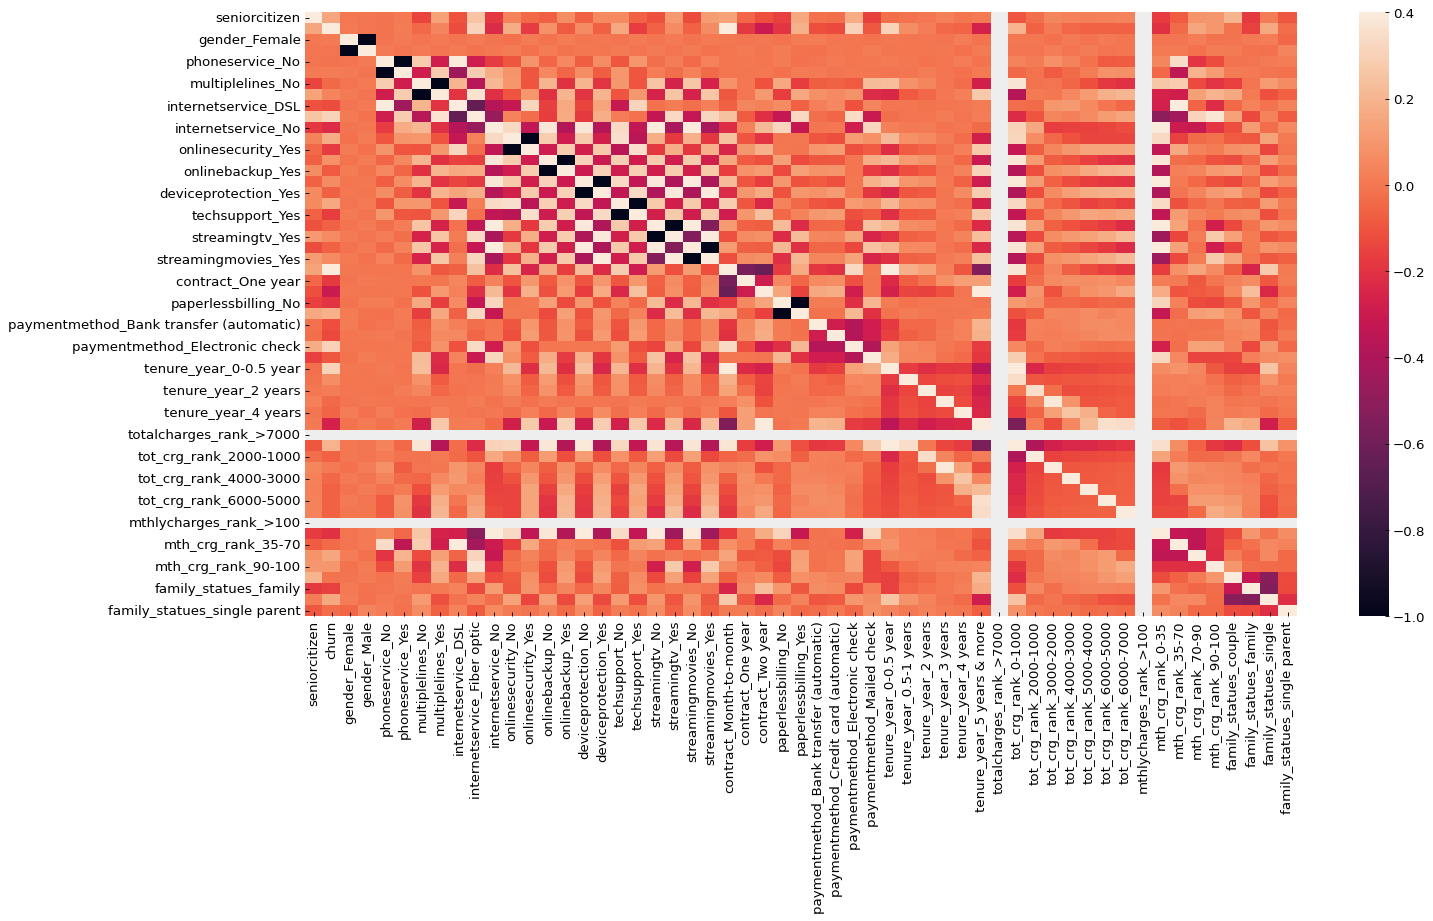

In [37]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(dfc.corr(), vmax=.4,ax=ax)

0    0.73463
1    0.26537
Name: churn, dtype: float64

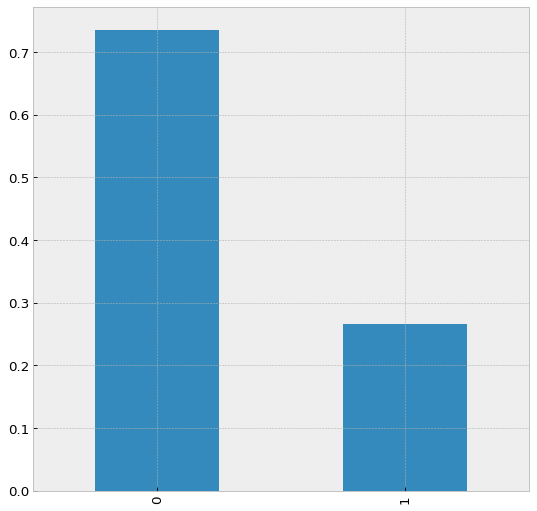

In [38]:
dfc.churn.value_counts(normalize=True).plot(kind='bar');
dfc.churn.value_counts(normalize=True)

Model 1 decision tree

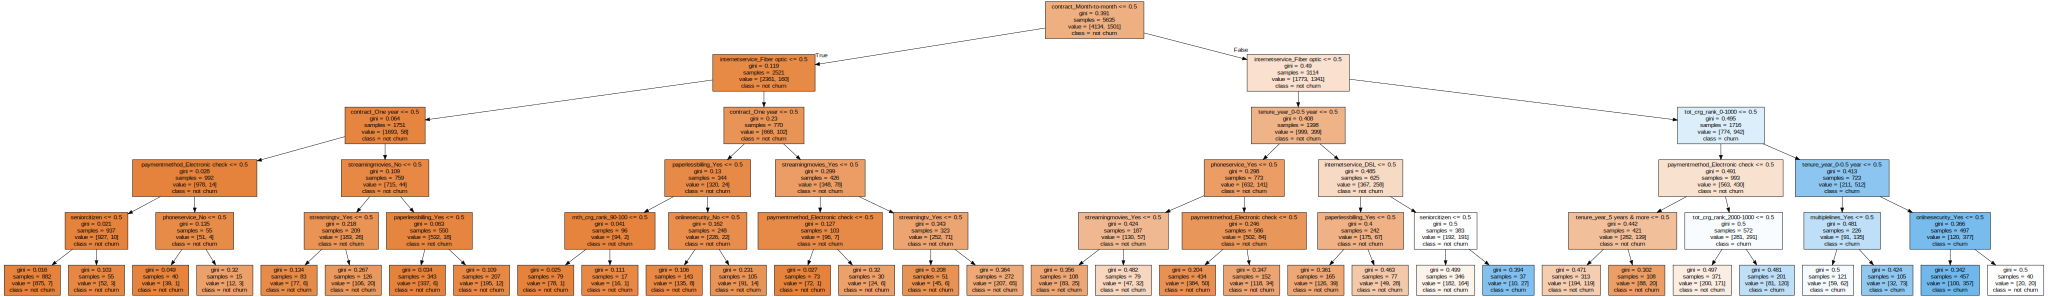

<Figure size 1600x960 with 0 Axes>

In [39]:



######      Decision Tree ###################
test_size = int(dfc.shape[0]*0.2)
train, test = train_test_split(dfc, test_size=test_size, random_state=0, shuffle=True)
label = 'churn'


x_train = train.drop(label, axis=1)
y_train = train[label]
x_test = test.drop(label, axis=1)
y_test = test[label]

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import pickle
clf = DecisionTreeClassifier(max_depth=5)

clf.fit(x_train, y_train)

y_test_pred_DecisionTree = clf.predict(x_test) 
output = pd.DataFrame({ 'what_actualy_happened':y_test, 'predicted_by_model': y_test_pred_DecisionTree}) 
output.to_csv('churn_DecisionTree_Prediction.csv', index=False) # saving 
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

fig=plt.figure(figsize=(20,12))
plot_tree(clf, x_train.columns, ['not churn', 'churn'],)
fig.savefig("decistion_tree.png")


In [40]:
y_test

2200    0
4627    0
3225    0
2828    0
3768    0
       ..
2453    0
2631    1
5333    1
6972    1
4598    0
Name: churn, Length: 1408, dtype: int64

Model 2 Random forest

In [41]:
######           Random forest Model ##########################

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
output = pd.DataFrame({ 'what_actualy_happened':y_test, 'predicted_by_model': y_test_pred_RandomForest})
output.to_csv('churn_RandomForest_Prediction.csv', index=False)

output


,what_actualy_happened,predicted_by_model
2200,0,0
4627,0,0
3225,0,0
2828,0,0
3768,0,0
...,...,...
2453,0,1
2631,1,0
5333,1,0
6972,1,0


In [42]:
feature_importances = model.feature_importances_ 
feature_importances
features = x_train.columns 
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) 
stats.sort_values('importance', ascending=False)

,feature,importance
22,contract_Month-to-month,0.171331
8,internetservice_Fiber optic,0.138873
29,paymentmethod_Electronic check,0.104578
31,tenure_year_0-0.5 year,0.095745
24,contract_Two year,0.075602
36,tenure_year_5 years & more,0.067139
38,tot_crg_rank_0-1000,0.049332
46,mth_crg_rank_0-35,0.042166
9,internetservice_No,0.036019
23,contract_One year,0.031122


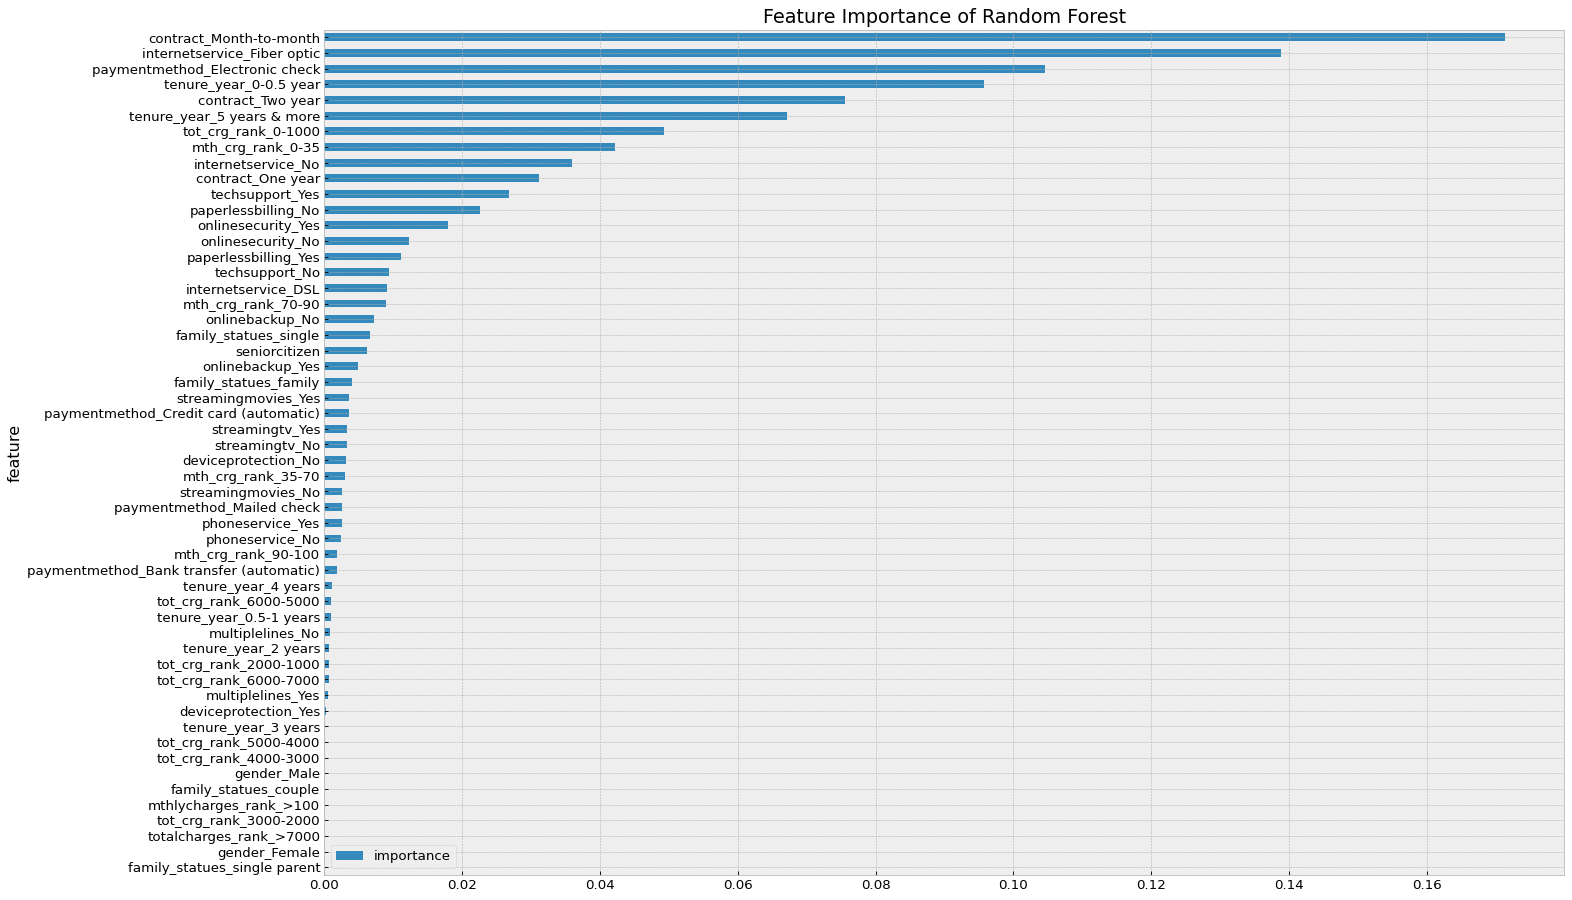

In [43]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh', figsize=(20,14))
plt.title('Feature Importance of Random Forest');  

Model 3 KNN

In [44]:
####### KNN ##############
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
y_test_pred_Knn
output = pd.DataFrame({ 'what_actualy_happened':y_test, 'predicted_by_model': y_test_pred_Knn})
output.to_csv('churn_Knn_Prediction.csv', index=False)



In [45]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7848011363636364

In [46]:
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7670454545454546

In [47]:
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7414772727272727

In [48]:
####Decision Tree best Accuracy depth=5###

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7848011363636364

In [49]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7819602272727273

In [50]:
####Random forest best Accuracy depth=8 n_estimators = 9   ###

model = RandomForestClassifier(n_estimators=9, max_depth=8, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc



0.7826704545454546

In [51]:

model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc



0.7869318181818182

In [52]:


model = RandomForestClassifier(n_estimators=3, max_depth=8, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc



0.7798295454545454

In [53]:

clf = KNeighborsClassifier(n_neighbors=90)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc


0.7883522727272727

In [54]:

clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc


0.7776988636363636

In [55]:

clf = KNeighborsClassifier(n_neighbors=40)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc


0.7805397727272727

In [56]:
####### Knn best Accuracy-- n_neighbors = 20
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc


0.7819602272727273

In [57]:
####### Knn best Accuracy-- n_neighbors = 90
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc


0.7713068181818182

In [58]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 

x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test) 

clf = KNeighborsClassifier(n_neighbors=80)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)


output = pd.DataFrame({ 'what_actualy_happened':y_test, 'predicted_by_model': y_test_pred_Knn, 'survived_predicted_by_model_scaled':y_test_pred_Knn_Scaled}) 
output.to_csv('improve_churn_Knn_Prediction_scaled.csv', index=False) 


test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.7876420454545454

improvment from 0.7819 to 0.7876

In [59]:
def get_benchmark_predictions(x, benchmark_value):
    return np.ones(len(x))*benchmark_value
benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.7386363636363636